# Sales Analysis Project

<br>

**Project Source:** *Keith Galli YouTube Videos*
<br>
<br>
**Keith Galli Links:**
<br><br>
[YouTube Channel](https://www.youtube.com/c/KGMIT)<br><br>
[YouTube Video for the Project](https://www.youtube.com/watch?v=eMOA1pPVUc4)<br><br>
[Project Github Link](https://github.com/KeithGalli/Pandas-Data-Science-Tasks)

The data used in the following project seems to be collected from an electronics store and consists of general sales data with unique Order IDs for different orders and other necessary data to keep a record of the particular orders.

## Data Description
<br>

### Columns:

**Order ID** - Unique Order IDs for different orders with single or multiple items.
<br>
**Product** - The actual product being bought in the particular order.
<br>
**Quantity Ordered** - Quantity of the product being ordered.
<br>
**Price Each** - The price of a single unit of that particular product.
<br>
**Order Date** - The date and time of the order accurate up to minutes.
<br>
**Purchase Address** - Address of the customer ordering the product.

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import dateutil.parser as parser
import math
import calendar

### 1. Merging 12 CSVs (for each month) into a single dataframe.

Let's have a look at the actual data format for the files.

**January**

In [2]:
jan_data = pd.read_csv('Sales_Data/Sales_January_2019.csv')
jan_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


**February**

In [3]:
feb_data = pd.read_csv('Sales_Data/Sales_February_2019.csv')
feb_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


The data format is same accross all the files for all the 12 months.

**Now, we'll combine all the 12 CSVs into a single file for convenience.**

In [4]:
combined_data = pd.concat([jan_data, feb_data])
#Writing the months left to combine after the initial concatenation.
months = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for month in months:
    month_data_string = 'Sales_Data/Sales_{}_2019.csv'.format(month)
    combined_data = pd.concat([combined_data, pd.read_csv(month_data_string)])
combined_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [5]:
combined_data.reset_index(inplace = True, drop = True)
combined_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


Now, we have our combined dataset ready for analysis.<br>
Let's export the combined data file we created.

In [6]:
combined_data.to_csv('all_data.csv', index = False)

<br>

### Question.1: What was the best month for sales? How much was earned that month?

Let's check the data-type of the order date column.

In [7]:
combined_data['Order Date'].dtype

dtype('O')

We'll convert this object type to datetime.

In [8]:
index = 0
for i in combined_data['Order Date']:
    try:
        combined_data.loc[index, 'Order Date'] = parser.parse(str(i))
        index += 1
    except:
        index += 1
        continue

In [9]:
combined_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


Let's check the number of null values in the data.

In [10]:
pd.isnull(combined_data).sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

**Seems like all rows with null values have 'NaN' for all the columns.**

In [11]:
combined_data[combined_data['Order Date'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184678,NaN,NaN,NaN,NaN,NaN,NaN
184695,NaN,NaN,NaN,NaN,NaN,NaN
185042,NaN,NaN,NaN,NaN,NaN,NaN
185729,NaN,NaN,NaN,NaN,NaN,NaN


As, we can see the no. of rows with null values is a very small fraction of the total no. of rows, therefore, we can drop these rows.

In [12]:
combined_data.dropna(inplace = True)
combined_data.reset_index(drop = True, inplace = True)
combined_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186301,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186302,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186303,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


**Now, let's start working on the actual question for the best month for sales.**

In [13]:
combined_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

**Making a copy of the data for analysis**

In [14]:
data1 = combined_data.copy()
data1.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001"


In [15]:
# Making a new column for total amount which will be Quantity Ordered * Price Each

for i in data1.index:
    if pd.isna(data1.loc[i, 'Order ID']):
        data1.loc[i, 'Total Price'] = math.nan
    else:
        try:
            data1.loc[i, 'Total Price'] = float(data1.loc[i, 'Quantity Ordered']) * float(data1.loc[i, 'Price Each'])
        except:
            #On some research through the data, we found that some of the rows had the column values exactly same as the column 
            #name, so we put the values for 'Total Price' in them as NaN as well.
            data1.loc[i, 'Total Price'] = math.nan

In [16]:
data1.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",2.99
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",389.99


Before actually working on the data, let's drop the new NaN valued rows we just made.

In [17]:
data1.isnull().sum()

Order ID              0
Product               0
Quantity Ordered      0
Price Each            0
Order Date            0
Purchase Address      0
Total Price         355
dtype: int64

In [18]:
data1.dropna(inplace = True)
data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99
...,...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95
186301,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68
186302,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00
186303,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99


**Let's compute the overall sales for each month.**

In [19]:
for i in data1.index:
    try:
        data1.loc[i, 'Order Month'] = calendar.month_name[data1['Order Date'][i].month]
    except:
        continue
data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Order Month
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,January
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,January
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,January
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,January
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,January
...,...,...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,December
186301,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,December
186302,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,December
186303,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,December


In [20]:
monthwise_data1 = data1.groupby('Order Month')[['Total Price']].sum()
monthwise_data1

,Total Price
Order Month,
April,3390670.24
August,2244467.88
December,4613443.34
February,2202022.42
January,1822256.73
July,2647775.76
June,2577802.26
March,2807100.38
May,3152606.75


In [21]:
monthwise_data1 = monthwise_data1.reindex(index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
monthwise_data1

,Total Price
Order Month,
January,1822256.73
February,2202022.42
March,2807100.38
April,3390670.24
May,3152606.75
June,2577802.26
July,2647775.76
August,2244467.88
September,2097560.13


<AxesSubplot:xlabel='Total Price', ylabel='Order Month'>

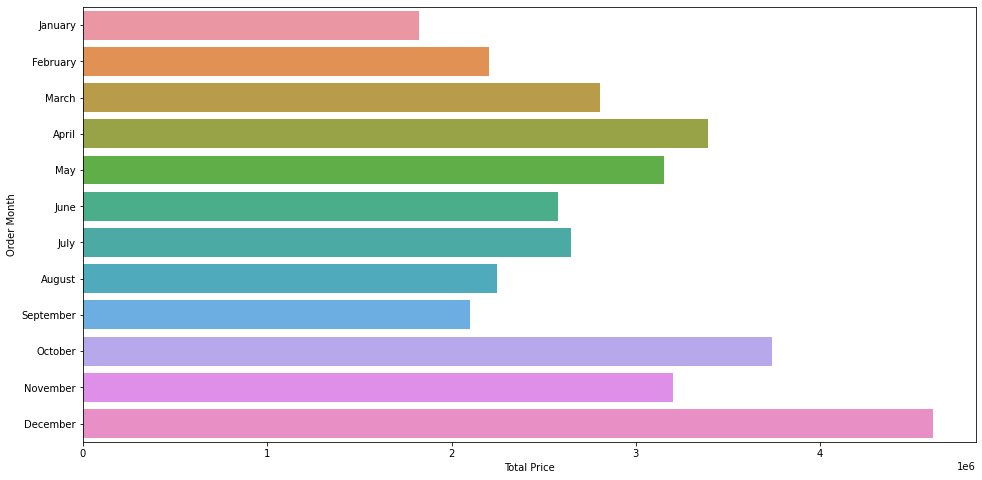

In [22]:
plt.figure(figsize = (16, 8))
sns.barplot(x = monthwise_data1['Total Price'], y = monthwise_data1.index)

**It seems quite clear from the barplot above that the month with the most sales in terms of price is 'December'.**

<br>

**Another way to find out the same answer:**

In [23]:
monthwise_data1.index[monthwise_data1['Total Price'] == monthwise_data1['Total Price'].max()].tolist()

['December']

<br>

<br>

### Question.2: Which city had the highest number of sales?

**Before moving forward, we will eliminate the letfover invalid data in the combined dataset and update it in the new csv file.**

The invalid data being mentioned in the above cell is the data where the data values are the same as the column names.

In [24]:
combined_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186301,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186302,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186303,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [25]:
index = 0
while True:
    try:
        int(combined_data.loc[index, 'Order ID'])
    except:
        combined_data.drop(index, inplace = True)
    index += 1
    if index > 186304:
        break

In [26]:
combined_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186301,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186302,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186303,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [27]:
combined_data.to_csv('all_data.csv', index = False)

Continuing on the question about the city with highest sales. We can use the same data we used for the first question for this one as well.

In [28]:
data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Order Month
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,January
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,January
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,January
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,January
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,January
...,...,...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,December
186301,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,December
186302,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,December
186303,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,December


**Let's make another column for the city extracted from the purchase address.**

In [29]:
for i in data1.index:
    data1.loc[i, 'City'] = data1.loc[i, 'Purchase Address'].split(', ')[1]
data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Order Month,City
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,January,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,January,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,January,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,January,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,January,Austin
...,...,...,...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,December,San Francisco
186301,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,December,Los Angeles
186302,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,December,Seattle
186303,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,December,Dallas


In [30]:
citywise_data = data1.groupby(['City'])[['City']].count().rename(columns = {'City' : 'Count'})
citywise_data

,Count
City,
Atlanta,14881
Austin,9905
Boston,19934
Dallas,14820
Los Angeles,29605
New York City,24876
Portland,12465
San Francisco,44732
Seattle,14732


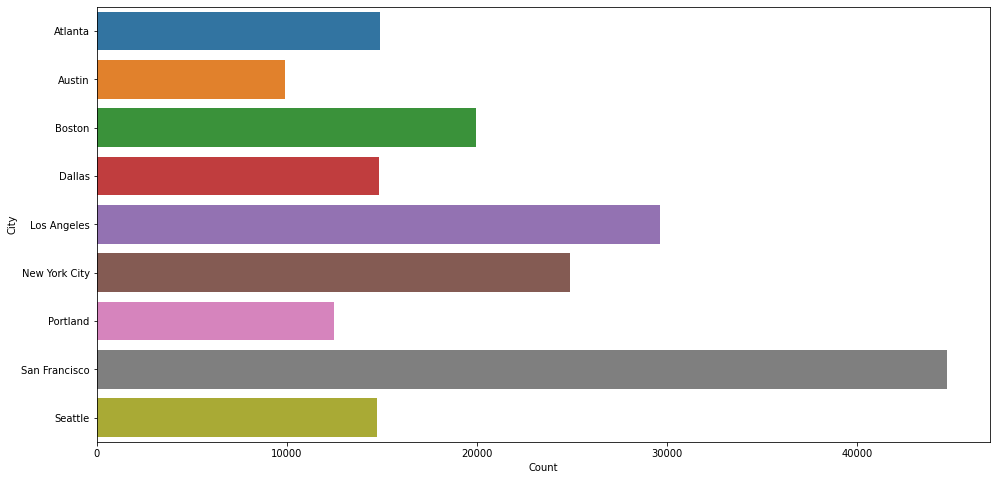

In [31]:
plt.figure(figsize = (16, 8))
plt.xlabel('No. of sales')
plt.ylabel('City')
fig = sns.barplot(x = citywise_data['Count'], y = citywise_data.index)
plt.show(fig)

**So, it turns out that 'San Francisco' has the highest number of sales according to the given data.**

<br>

### Question.3: What time should we display advertisements to maximize the likelihood of customer's buying product?

In [32]:
data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Order Month,City
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,January,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,January,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,January,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,January,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,January,Austin
...,...,...,...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,December,San Francisco
186301,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,December,Los Angeles
186302,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,December,Seattle
186303,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,December,Dallas


In [33]:
data1['Hour'] = data1['Order Date'].apply(lambda x: x.hour)
data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Order Month,City,Hour
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,January,Boston,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,January,Portland,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,January,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,January,Los Angeles,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,January,Austin,11
...,...,...,...,...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,December,San Francisco,20
186301,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,December,Los Angeles,12
186302,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,December,Seattle,6
186303,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,December,Dallas,10


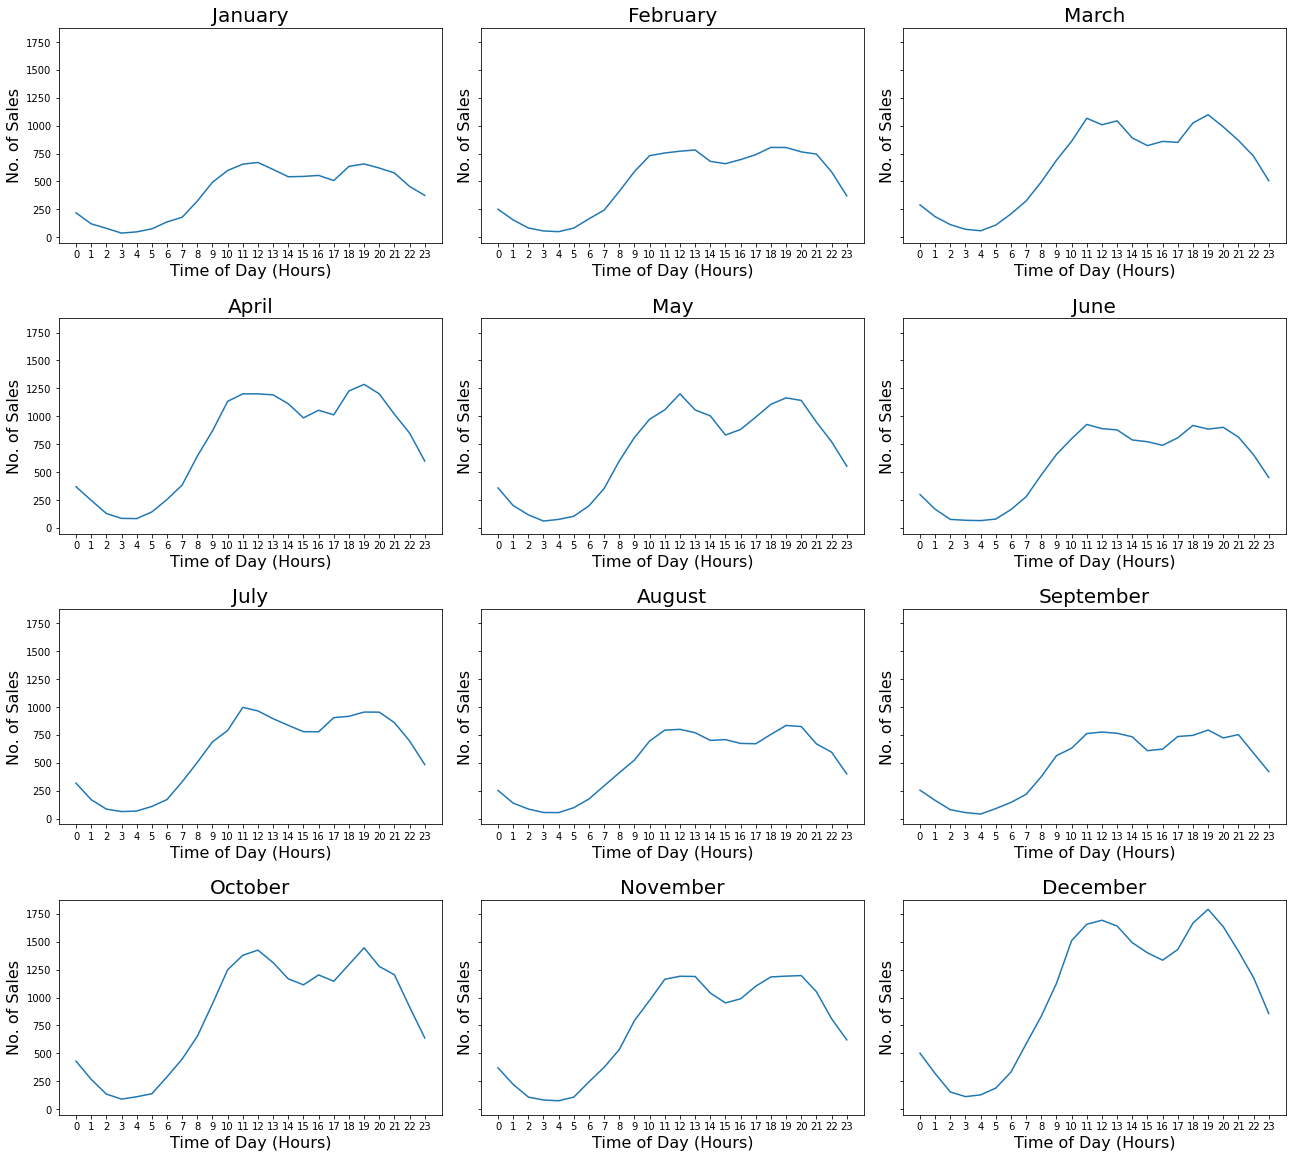

In [34]:
fig, axes = plt.subplots(4, 3, figsize = (22, 20), sharey = True)
month = 1
for ax in axes:
    for axi in ax:
        monthName = calendar.month_name[month]
        df = data1[data1['Order Month'] == monthName].groupby(['Hour'])[['Product']].count().rename(columns = {'Product' : 'No. of Sales'})
        axi.set_xlabel('Time of Day (Hours)',  fontsize = 16)
        axi.set_ylabel('No. of Sales', fontsize = 16)
        axi.set_title(monthName, fontsize = 20)
        axi.set_xticks(df.index)
        axi.plot(df.index, df['No. of Sales'])
        month += 1
plt.subplots_adjust(hspace = 0.35, wspace = 0.1)

## Inferences:

- The pattern for the sales is quite similar throughout the year.
- Although, the no. of sales varies in different months.
- The sales generally rise after 11a.m. and the peak time is generally around 8-9 p.m.
- The time for displaying advertisements then, should be before these durations to maximise the reach and audience.
- The optimal time for the advertisements would be around maybe 8-9 a.m. or maybe in the afternoon around 2-3 p.m. which is the time before the no. of sales start rising towards the final peak of the day.
- The last three months go the highest in terms of number of sales, which is quite understandable that being the holiday season.

### Question.4: What products are most often sold together?

In [35]:
data1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Order Month,City,Hour
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,January,Boston,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,January,Portland,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,January,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,January,Los Angeles,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,January,Austin,11
...,...,...,...,...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,December,San Francisco,20
186301,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,December,Los Angeles,12
186302,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,December,Seattle,6
186303,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,December,Dallas,10


The items bought together will be the ones with the same 'Order ID'. Therefore, let's make a subset of the data with duplicate Order IDs.

In [36]:
data4 = data1.set_index(['Order ID'], drop = True)
data4

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Order Month,City,Hour
Order ID,,,,,,,,,
141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,January,Boston,21
141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,January,Portland,14
141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,January,San Francisco,13
141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,January,Los Angeles,20
141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,January,Austin,11
...,...,...,...,...,...,...,...,...,...
319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,December,San Francisco,20
319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,December,Los Angeles,12
319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,December,Seattle,6


In [37]:
data4 = data4.loc[data4.index.duplicated(keep = False)]
data4

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Order Month,City,Hour
Order ID,,,,,,,,,
141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.95,January,Austin,16
141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.99,January,Austin,16
141290,Apple Airpods Headphones,1,150,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",150.00,January,Los Angeles,8
141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",11.52,January,Los Angeles,8
141365,Vareebadd Phone,1,400,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",400.00,January,New York City,11
...,...,...,...,...,...,...,...,...,...
319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",11.99,December,Portland,0
319596,iPhone,1,700,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",700.00,December,New York City,8
319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",14.95,December,New York City,8


Let's see what's the biggest order we can see in the data in terms of no. of items bought together.

We'll make a dictionary with lists as keys for each combination of items and check and store their frequencies as values for the corresponding keys.

In [38]:
item_dict = dict()
for i in data4.index.drop_duplicates(keep = 'first'):
    item = ', '.join(data4.loc[i, ('Product')].tolist())
    item_dict[item] = item_dict.get(item, 0) + 1

**We'll now list out top-10 combos of items that were bought together the maximum no. of times.**

In [39]:
for combo, frequency in sorted(item_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)[:10]:
    items = combo.split(', ')
    print(f"{' & '.join(items)} were bought together {frequency} times.")

iPhone & Lightning Charging Cable were bought together 882 times.
Google Phone & USB-C Charging Cable were bought together 856 times.
iPhone & Wired Headphones were bought together 361 times.
Vareebadd Phone & USB-C Charging Cable were bought together 312 times.
Google Phone & Wired Headphones were bought together 303 times.
iPhone & Apple Airpods Headphones were bought together 286 times.
Google Phone & Bose SoundSport Headphones were bought together 161 times.
Vareebadd Phone & Wired Headphones were bought together 104 times.
Google Phone & USB-C Charging Cable & Wired Headphones were bought together 77 times.
Vareebadd Phone & Bose SoundSport Headphones were bought together 60 times.


### Question.5: What product sold the most? Why do you think it did?

In [40]:
data5 = combined_data.copy()
data5.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001"


In [41]:
data5["Quantity Ordered"] = data5['Quantity Ordered'].apply(lambda x : int(x))

In [42]:
product_wise = data5.groupby('Product')[['Quantity Ordered']].sum()
product_wise.sort_values(by = 'Quantity Ordered', ascending = False)

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


<AxesSubplot:xlabel='Quantity Ordered', ylabel='Product'>

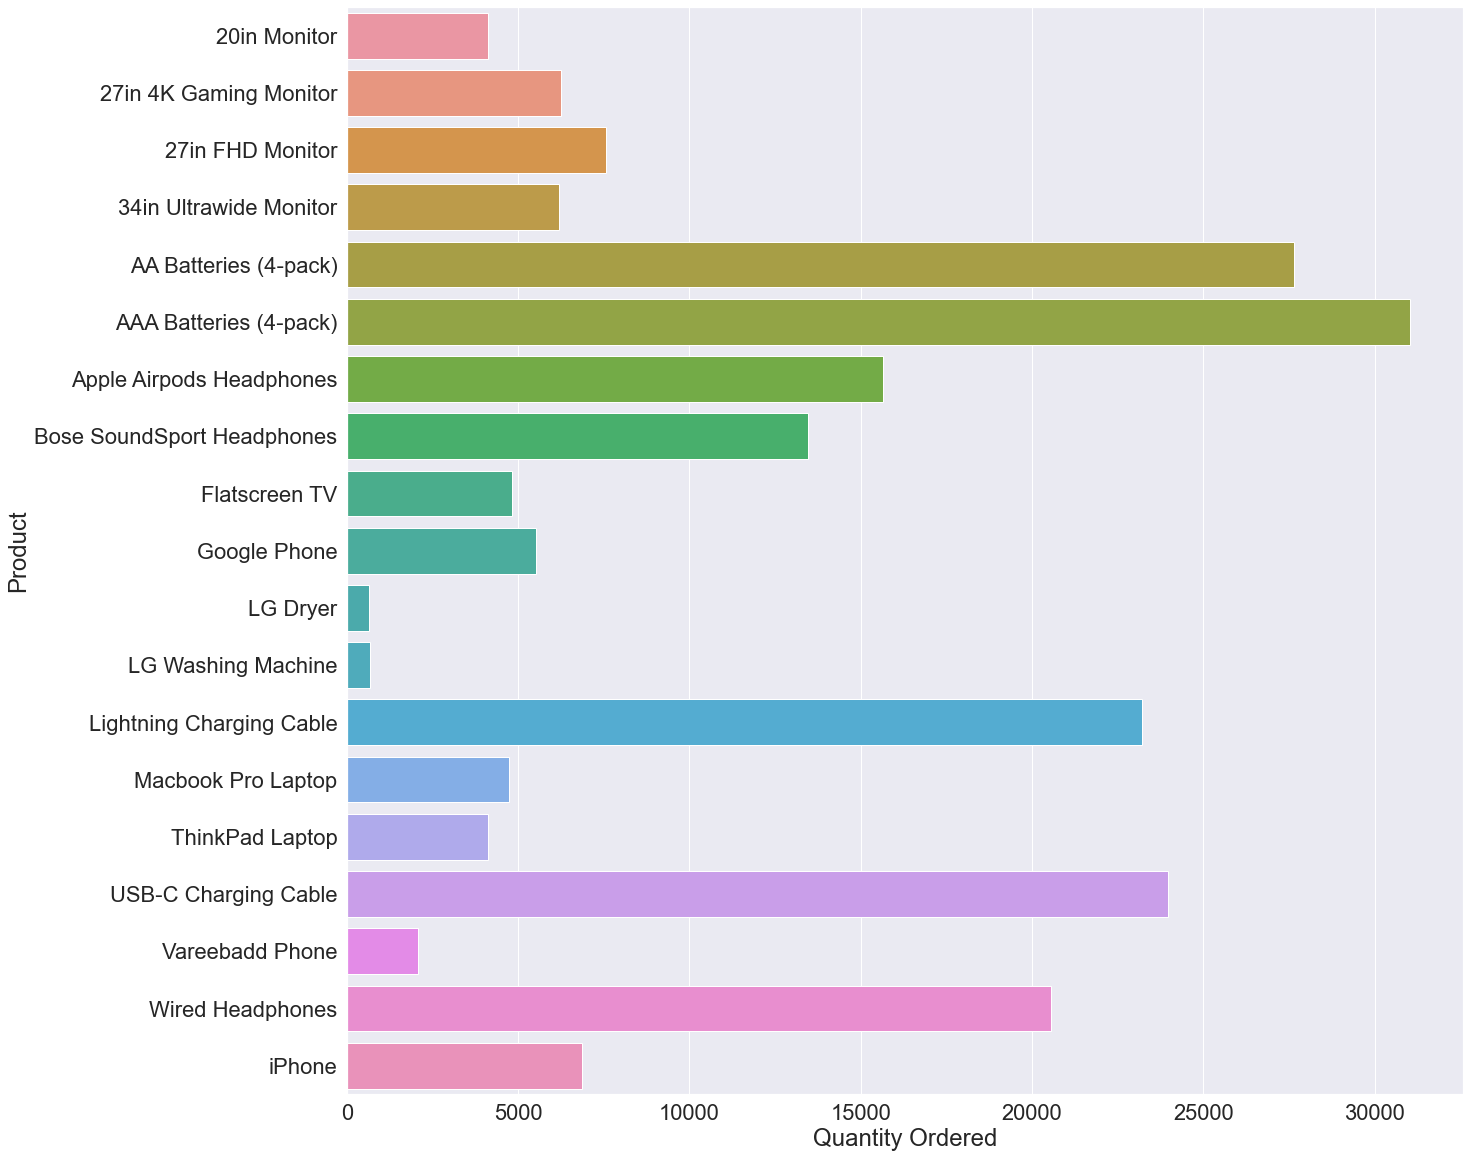

In [43]:
plt.figure(figsize = (20, 20))
sns.set(font_scale = 2)
sns.barplot(x = product_wise['Quantity Ordered'], y = product_wise.index)

**As we can see, AAA & AA batteries top the list in terms of most bought products.**
<br>
The main reason for this is the high usability or the no. of use cases the batteries have.
<br>
A lot of other electrical appliances, irrespective of being bought from this specific store or not require a number of certain batteries for their functioning. Even a single remote control requires 2 to 4 batteries at once for its working.
<br>
Therefore, the high dependency of other appliances on the batteries explains the high demand and sales for them.